In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(108, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [8]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [11]:
df['State'].nunique()

3

In [12]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
df['State'].value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['State'] = le.fit_transform(df['State'])

In [17]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [18]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [19]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


In [20]:
import seaborn as sns

<AxesSubplot:>

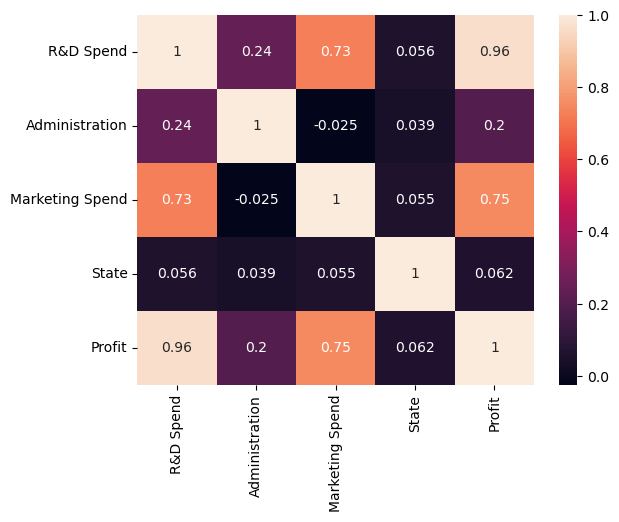

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.corr()['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
State              0.061662
Name: Profit, dtype: float64

In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### x and y split

In [25]:
x = df.drop(columns = ['Profit'],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [27]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()  # range is from -1 to 1 in Standard Scaler

In [33]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


### Train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape

(86, 4)

In [37]:
x_test.shape

(22, 4)

In [43]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State
84,-1.651331,0.088332,-1.814870,1.167315
10,0.601813,-0.410238,0.121034,-0.033352
75,-1.033670,0.195084,-0.117776,-0.033352
2,1.752320,-0.757668,1.643929,-0.033352
24,0.046546,-0.826216,-0.633593,1.167315


In [44]:
y_test.head()

84     64926.08
10    146121.95
75     90708.19
2     191050.39
24    108552.04
Name: Profit, dtype: float64

In [38]:
y_train.shape

(86,)

In [39]:
y_test.shape

(22,)

## Model building

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

### Testing

In [45]:
y_predict = model.predict(x_test)
y_predict

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [54]:
y_predict2 = model.predict(x_train)
y_predict2

array([110339.36711747, 171326.34156933,  98169.73349428, 173984.89235457,
       116394.84120632,  48728.97472674,  98701.8096438 , 155793.74222107,
        83173.3979165 , 193329.17668167, 188881.89497877, 163705.08384309,
       129123.46097713, 116687.20083441, 116394.84120632, 129222.38731942,
       115568.27177598, 129123.46097713, 112966.00035112,  97478.45007514,
        60870.14590928, 188881.89497877,  75059.36096014,  70421.48595141,
        75026.31650688, 171326.34156933, 146304.26215166, 131295.5367997 ,
        75059.36096014,  70560.72299298, 163705.08384309, 149410.05441   ,
       134848.9192467 , 131295.5367997 , 193329.17668167,  89793.68742016,
       102116.15226573, 116752.96050775, 134241.68257226, 134241.68257226,
       110757.21399109,  91210.10094151, 110757.21399109,  98105.33260626,
       152502.87810448, 129222.38731942,  64558.26417224, 173984.89235457,
        97478.45007514, 181561.78529188, 149410.05441   ,  71079.10061908,
       114687.4839992 , 1

In [46]:
profit = pd.DataFrame({'Actual Profit':y_test,'Predicted Profit':y_predict})

In [47]:
profit

,Actual Profit,Predicted Profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


### Testing with random values

In [48]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [49]:
model.predict([[162597.70,101145.55,383199.62,0]])

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.26198888e+09])

In [50]:
model.predict([[162597.70,101145.55,383199.62,0]])/100000

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([72619.88884683])

In [51]:
model.predict([[142107.34,136897.80,383199.62,2]])/100000

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65350.80019881])

# Model Evaluation metrics

## R-squared Score

In [52]:
from sklearn import metrics

#### Evaluating testing accuracy

In [53]:
print(metrics.r2_score(y_test,y_predict))

0.9258962347553816


#### Evaluating training accuracy

In [58]:
print(metrics.r2_score(y_train,y_predict2))

0.937696994680168


#### if training and testing accuracies have a large difference, it is called over fitting model. If both are similar, then only our model predictions are correct. if training accuracy >> testing accuracy, it is over fitting model, if training accuracy << testing accuracy, it is called under fitting model. 
#### WORST CASE is under fitting model

## MSE (Mean Squared error)

In [59]:
print(metrics.mean_squared_error(y_test,y_predict))

96015241.54707728


## RMSE (Root Mean Squared Error)

In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

9798.736732205702


# Polynomial regression